In [71]:
import pandas as pd
import matplotlib.pyplot as plt

def load_data(path="../data/insurance.csv"):
    """Load the raw CSV into a DataFrame."""
    return pd.read_csv(path)

def summarize_dataframe(df):
    """Return a dict with shape, missing_counts, summary_stats."""
    return {
        "shape": df.shape,
        "missing_counts": df.isna().sum(),
        "summary_stats": df.describe()
    }

def compute_category_counts(df, cols):
    """Return a dict of value_counts for each categorical column."""
    return {col: df[col].value_counts() for col in cols}

def compute_numeric_corr(df, cols):
    """Return correlation matrix for given numeric columns."""
    return df[cols].corr()

def plot_histogram(series, bins=None, title=None, xlabel=None, ylabel=None):
    fig, ax = plt.subplots()
    ax.hist(series, bins=bins)
    if title:  ax.set_title(title)
    if xlabel: ax.set_xlabel(xlabel)
    if ylabel: ax.set_ylabel(ylabel)
    ax.grid(True)
    return fig, ax

def plot_boxplot(df, column, title=None, ylabel=None):
    fig, ax = plt.subplots()
    df.boxplot(column=column, ax=ax)
    if title:  ax.set_title(title)
    if ylabel: ax.set_ylabel(ylabel)
    ax.grid(True)
    return fig, ax

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("../data/insurance.csv")


In [50]:
# DataFrame info: types & non-null counts
info = df.info()
print("info")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
info


In [51]:
# missing values
missing_counts = df.isna().sum()
print("Missing values per column:\n", missing_counts)

Missing values per column:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [52]:
# Quick stats
print(df['charges'].describe())

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64


In [53]:
# Compute mean and median
mean_charge   = df['charges'].mean()
median_charge = df['charges'].median()

print(f"Mean charges:   {mean_charge:,.2f}")
print(f"Median charges: {median_charge:,.2f}")

Mean charges:   13,270.42
Median charges: 9,382.03


In [54]:
# Compute BMI range
bmi_min = df['bmi'].min()
bmi_max = df['bmi'].max()

print(f"BMI min = {bmi_min}")
print(f"BMI max = {bmi_max}")

BMI min = 15.96
BMI max = 53.13


In [55]:
shape = df.shape
print("Rows, Columns:", shape)

Rows, Columns: (1338, 7)


In [56]:
# Category counts
sex_counts    = df['sex'].value_counts()
smoker_counts = df['smoker'].value_counts()
region_counts = df['region'].value_counts()

print("\nSex distribution:\n", sex_counts)
print("\nSmoker distribution:\n", smoker_counts)
print("\nRegion distribution:\n", region_counts)


Sex distribution:
 male      676
female    662
Name: sex, dtype: int64

Smoker distribution:
 no     1064
yes     274
Name: smoker, dtype: int64

Region distribution:
 southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [57]:
# correlations for age, bmi, children
numeric_corr = df[['age','bmi','children','charges']].corr()
print("\nNumeric correlations:\n", numeric_corr)



Numeric correlations:
                age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


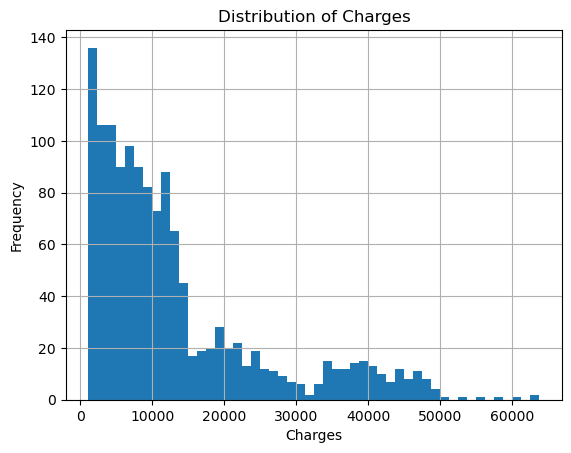

In [58]:
# Charges histogram
fig_charges, ax_charges = plt.subplots()
ax_charges.hist(df['charges'], bins=50)
ax_charges.set_title('Distribution of Charges')
ax_charges.set_xlabel('Charges')
ax_charges.set_ylabel('Frequency')
ax_charges.grid(True)

In [59]:
print("Skewness:", df['charges'].skew())

Skewness: 1.5158796580240388


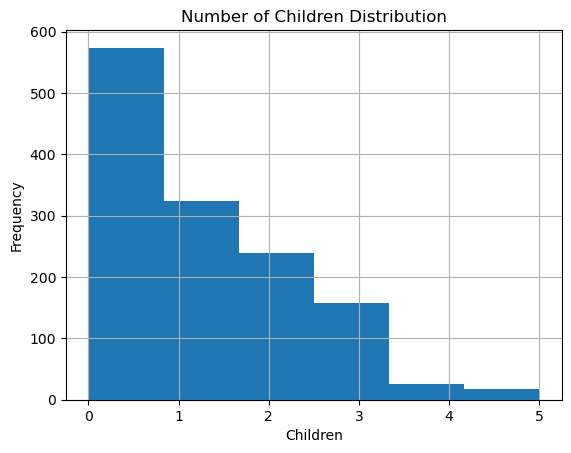

In [61]:
# Children count histogram
fig_children, ax_children = plt.subplots()
ax_children.hist(df['children'], bins=df['children'].nunique())
ax_children.set_title('Number of Children Distribution')
ax_children.set_xlabel('Children')
ax_children.set_ylabel('Frequency')
ax_children.grid(True) 


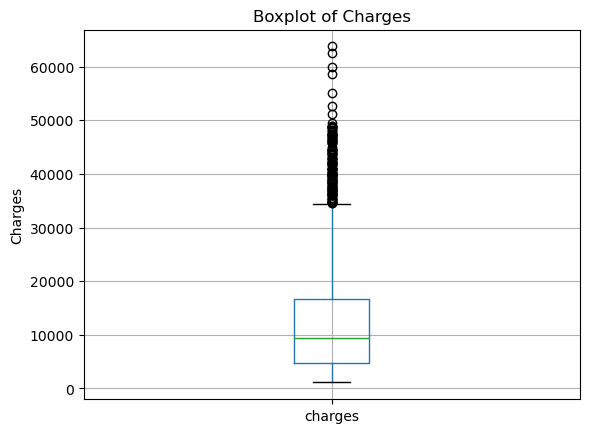

In [62]:
# Charges boxplot
fig_box, ax_box = plt.subplots()
df.boxplot(column='charges', ax=ax_box)
ax_box.set_title('Boxplot of Charges')
ax_box.set_ylabel('Charges')
ax_box.grid(True) 